# Tutorial 1

In [2]:
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import sys
import os

In [3]:
FDA_DIR = os.path.join(os.getcwd(), os.pardir, r'PycharmProjects/Financial-Data-Analytics')

if not os.path.exists(FDA_DIR):
    os.makedirs(FDA_DIR)
    print(f"Creating {FDA_DIR}")
else:
    print(f"{FDA_DIR} already exists")

/Users/cheungjustin/RMSC4002/../PycharmProjects/Financial-Data-Analytics already exists


In [4]:
# !git clone https://github.com/kaiser1999/Financial-Data-Analytics.git $FDA_DIR

Be sure to clone the ```Financial-Data-Analytics``` repo!

In case there are errors: 
1. please check if Git is installed, if not run ```!conda install git -y```
2. please check if the environment variable ```PATH``` includes Git
3. after 1&2, restart your anaconda first

#### Some Useful Functions 

In [7]:
DATA_DIR = rf'{FDA_DIR}/Datasets'

def read_file(filename, dir=None, static=False, **kwargs):
    if dir is None:
        dir = DATA_DIR
        
    path = os.path.join(dir, filename)
    extension = filename.rsplit('.', 1)[-1]

    if extension == 'csv':
        return pd.read_csv(path, **kwargs)
    elif extension in ['parq', 'parquet']:
        return pd.read_parquet(path, **kwargs)
    elif extension == 'json':
        with open(path, 'r') as file:
            return json.load(file)
    elif extension == 'xlsx':
        return pd.read_excel(path, **kwargs)
    else:
        raise NotImplementedError

In [8]:
CMAP = sns.diverging_palette(20, 220, as_cmap=True)

def pretty_heatmap(df, figsize=(10, 5), title=None, annot=True, **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title, y=1)
    sns.heatmap(df, annot=annot, cmap=CMAP, ax=ax, cbar=False, **kwargs)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [9]:
random_state = 12345 # use whatever you want
rng = np.random.default_rng(random_state)

It is highly recommended that you create a repo in pycharm or any other IDE.

Inside the repo, you develop all the codes, and store the useful functions that you often recall in Jupyter notebook.

```sys.path.append(repo_path)```

After that, you can import the desired modules.

### 0. Common Python Data Structures

#### a. list

In [13]:
l = [1, 2, 4]

list is a "container" where we store elements. In Python, lists are dynamic, i.e. not fix-sized.

In [15]:
len(l)

3

```len``` means length of list.

In [17]:
print(l[0], l[1], l[-1], l[-2])

1 2 4 2


You must remember that unlike R, the **FIRST** index position starts at **0** in Python

In [19]:
l.append(5) 
l.remove(2) 
print(l)

[1, 4, 5]


lists are equipped with ```append``` and ```remove```. Notice that the modifications are in-place.

In [21]:
l[::-1]

[5, 4, 1]

```::-1``` reverses a list, in case you're interested, more precisely it is equivalent to ```l[slice(None, None, -1)]```

In [23]:
[*l, *[9, 7, 5]]

[1, 4, 5, 9, 7, 5]

```*``` operator unpack lists, we can use it to combine multiple lists.

In [25]:
for i, val in enumerate(l):
    print(i, val)

0 1
1 4
2 5


```enumerate``` declares an extra counter. 

It is particularly useful when you want to keep track of the order of your list (iterable in general, such as dict, string, dataframes)

In [27]:
start, end, step = 3, 15, 4
x = range(start, end, step)

for i in x:
    print(i)

3
7
11


```range``` is closely related to lists, in the sense it samples points from an interval.

The above means we generate a sequence, starting from 3, ending at but not including 15, with step size=4

#### b. dictionary

In [31]:
d = {1: 1, 2: 6, 4: 3, 7: 10, 8: 5, 9: 3}

Dictionary is a useful data structure, where we create a mapping between keys and values.

For instance, keys can be your friends' names, values are their weight and height.

In [33]:
for k, v in d.items():
    print(k, v)

1 1
2 6
4 3
7 10
8 5
9 3


The ```items``` method allows us to loop over a dictionary.

(k, v) is a shorthand for (key, value)

In [35]:
d[6] = 0 
d[4] = 4 
d.pop(7)

for k, v in d.items():
    print(k, v)

1 1
2 6
4 4
8 5
9 3
6 0


```pop``` allows us to delete a certain key, of course its corresponding value as well

```[]``` operator allows us to modify a dictionary in-place.

If the key does not exist, a new key will be inserted;
If the key does exists, the value will be modified.

In [37]:
x = [3, 7, 9]
y = [2, 4, 6]
d2 = dict(zip(x, y))
print(d2)

{3: 2, 7: 4, 9: 6}


Another way of defining dictionary is through ```zip```.

you can try to see what happens if ```len(x) != len(y)```

In [39]:
{**d, **d2}, {**d2, **d}

({1: 1, 2: 6, 4: 4, 8: 5, 9: 6, 6: 0, 3: 2, 7: 4},
 {3: 2, 7: 4, 9: 3, 1: 1, 2: 6, 4: 4, 8: 5, 6: 0})

```**``` operator unpacks dictionary, so that we can join multiple dictionaries.

Notice that **ordering matters**, ```{**d, **d2} is different from {**d2, **d}```.

Whenever there are duplicated keys, their values follow the last dictionary that contains such keys.

In ```{**d, **d2}```, the value of key ```9``` is 6. In ```{**d2, **d}```, the value of key ```9``` is 3.

#### c. pd.Series / pd.DataFrame

In [42]:
s = pd.Series({'a': 1, 'b': 6, 'e': 13})
s

a     1
b     6
e    13
dtype: int64

```pd.Series``` is a wrapper for dictionary.

In [44]:
df = pd.DataFrame({'q': [1.1, 1.5, 1.7],
                   'u': [3.1, 3.5, 3.7],
                   'v': [2.1, 2.5, 2.7]},
                 index=[9, 5, 4])
df

,q,u,v
9,1.1,3.1,2.1
5,1.5,3.5,2.5
4,1.7,3.7,2.7


```pd.DataFrame``` can be represented as a dictionary of lists.

In [46]:
df['q'], df.loc[4]

(9    1.1
 5    1.5
 4    1.7
 Name: q, dtype: float64,
 q    1.7
 u    3.7
 v    2.7
 Name: 4, dtype: float64)

We can access each column by either ```df[col], df.col, df.loc[:, col], df.iloc[:, col_pos]```

Likewise, we can access each row by either ```df.loc[index_name]``` or ```df.iloc[index_pos]```

In general, unless with a good reason, I don't recommend using ```iloc``` because it makes codes unreadable.

Also, as the coder, you should be able to design the relevant index or column name as you want.

#### d. String

In [49]:
x, y = 5, 7
s1 = 'x={x},y={y}'
s2 = f'x={x},y={y}'
print(s1 + ';' + s2)

x={x},y={y};x=5,y=7


There are many tricks for strings, the most important I want you to know is f-string.

It allows variables to be passed into the string, by enclosing them with ```{}```.

All you need to do is simply add an ```f``` in front.

There are much more to learn by yourself (at least ```np.array```) as you encounter different problems. Read the documentation whenever in doubt.


For built-in functions, read ```https://docs.python.org/3/library/functions.html```

For more advanced data structure or functionalities, I strongly recommend looking up modules ```collections, itertools, functools``` if interested.

### 1. Introduction

In [53]:
x = np.array([0, 1, 2, 3, np.nan, -4])
s = pd.Series(x)
s

0    0.0
1    1.0
2    2.0
3    3.0
4    NaN
5   -4.0
dtype: float64

In [54]:
np.nanmean(x), np.nanvar(x, ddof=1)

(0.4, 7.300000000000001)

Very often, we encounter missing data, so instead of ```np.mean()```, I want you to know ```np.nanmean()```

Just be careful about the degree of freedom ```ddof``` when using ```np.var```!

In [56]:
s.mean(), s.var()

(0.4, 7.300000000000002)

We also have ```mean()``` and ```var()``` in pandas for ```pd.Series``` and ```pd.DataFrame```

In [58]:
s[s < 2]

0    0.0
1    1.0
5   -4.0
dtype: float64

we use ```[]``` to select a subset of data, given a ```pd.Series of boolean```

In [60]:
qs = [0, 0.25, 0.5, 0.75, 1.0]
s.quantile(qs)

0.00   -4.0
0.25    0.0
0.50    1.0
0.75    2.0
1.00    3.0
dtype: float64

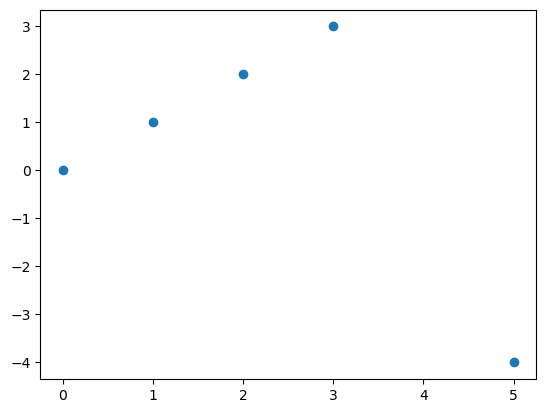

In [61]:
plt.scatter(s.index, s.values);

### 2. Numerical Optimization

In [63]:
def print_first_n_lines(s, n=None):
    if n is not None:
        s_split = s.split('\n')
        for i in range(n):
            print(s_split[i])
            
print_first_n_lines(minimize.__doc__, 50)

Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized.

            ``fun(x, *args) -> float``

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of

            - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
            - 'Powell'      :ref:`(see here) <optimize.minimize-powell>`
            - 'CG'          :ref:`(see here) <optimize.minimize-cg>`
            - 'BFGS'        :ref:`(see here) <

Whenever you are not familiar with a function, read the documentation by ```.__doc__```, or search it on Google.

In ```minimize```, we see the parameter ```method``` refer to different types of solver, some are more efficient at certain kind of optimization problems.

In [65]:
def obj_func(x: float):
    y = 3 * x ** 2 - 9 * x + 10
    return y

minimize(obj_func, x0=0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.25
        x: [ 1.500e+00]
      nit: 2
      jac: [-5.960e-08]
 hess_inv: [[ 1.667e-01]]
     nfev: 6
     njev: 3

We first define the function to be optimized. Then we pass the function to ```minimize``` and input our initial guess ```x0```

In [67]:
def obj_func_2(x: list):
    x1, x2 = x
    y = 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2
    return y

minimize(obj_func_2, x0=[0, 0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.843987518235081e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24

Likewise, we can run ```minimize``` for p-dimensional function which takes a list as input.

The trick is to add a line ```x1, x2, ..., xp = x```

### 3. Financial Data

In [70]:
fin_ratio_df = read_file('fin-ratio.csv')
fin_ratio_df

,EY,CFTP,ln_MV,DY,BTME,DTE,HSI
0,-1.8292,-0.1732,5.5405,0.000,1.0379,0.2466,0
1,-0.0797,-0.0830,6.8272,0.000,0.1275,25.4606,0
2,-2.2360,-0.6897,5.0102,0.000,-0.2959,3.3263,0
3,-1.5406,-4.1667,4.4954,0.000,-2.8571,0.9148,0
4,-0.9006,-0.3872,4.5031,0.000,2.7981,0.0753,0
...,...,...,...,...,...,...,...
675,0.0772,0.0327,7.9266,4.878,0.3303,0.3948,0
676,0.1447,0.2947,6.9895,3.774,1.6247,0.5565,0
677,0.0394,0.0324,6.9378,1.270,0.8139,0.6896,0
678,0.1153,0.1958,5.7867,0.000,2.9244,0.2420,0


In [71]:
fin_ratio_df.describe()

,EY,CFTP,ln_MV,DY,BTME,DTE,HSI
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,-0.650240,-0.233896,6.266807,2.496174,1.908263,0.709732,0.047059
std,4.300919,1.921734,1.656483,3.724455,8.264877,3.604568,0.211921
min,-69.157500,-25.000000,2.789100,0.000000,-50.000000,-55.647800,0.000000
25%,-0.262525,-0.166675,5.153600,0.000000,0.583225,0.242300,0.000000
50%,0.049450,0.063850,6.030000,0.000000,1.203800,0.505800,0.000000
75%,0.121325,0.183125,7.089350,4.012000,2.317650,0.954475,0.000000
max,11.294300,4.166700,13.673300,24.716000,203.800000,25.460600,1.000000


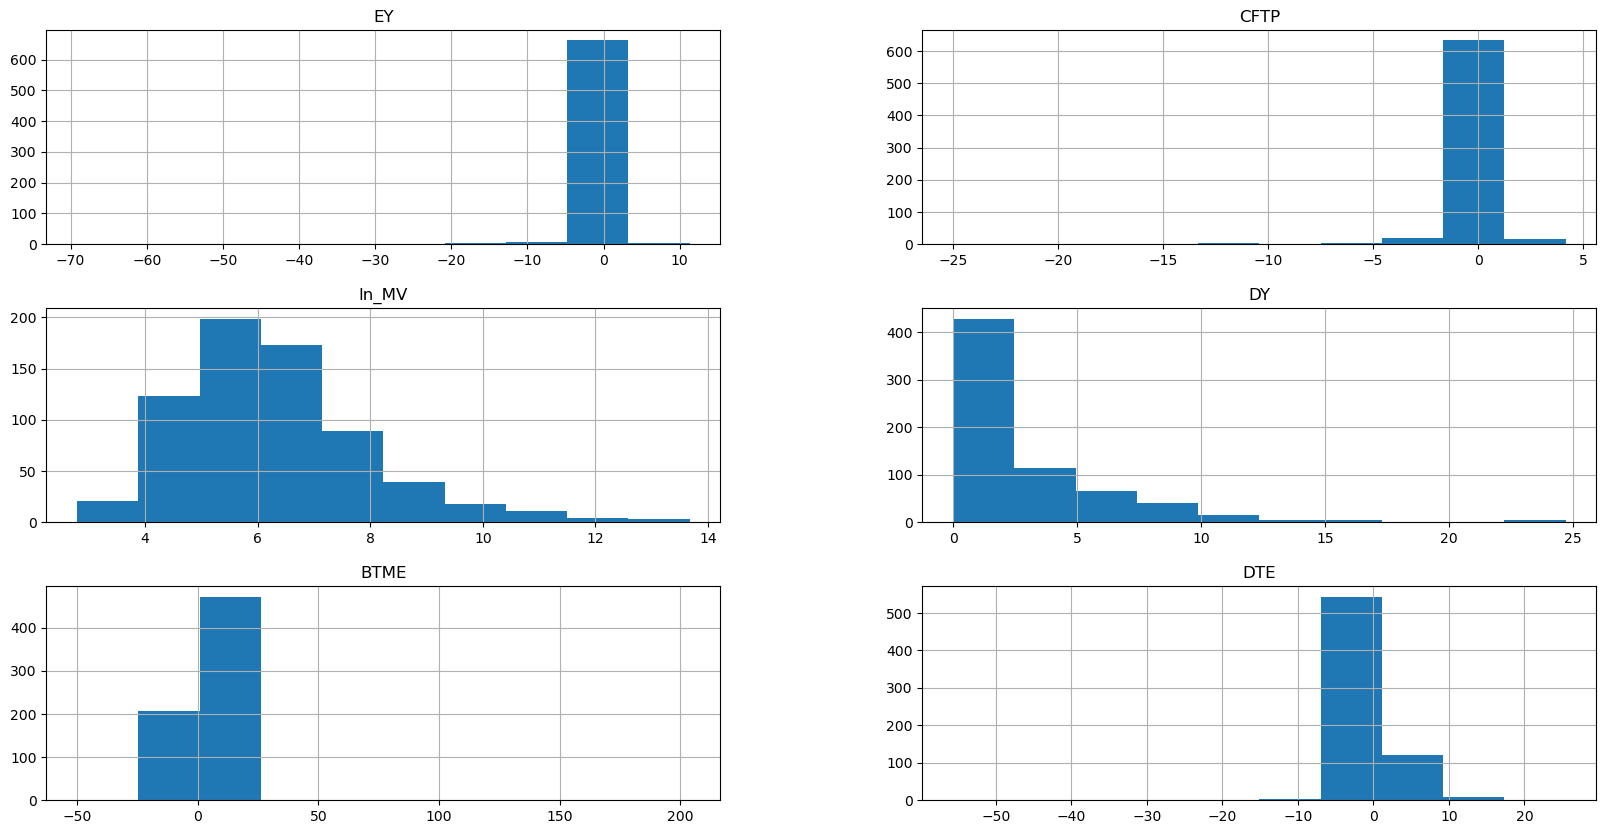

In [72]:
fin_ratio_df.drop(columns='HSI').hist(figsize=(20, 10));

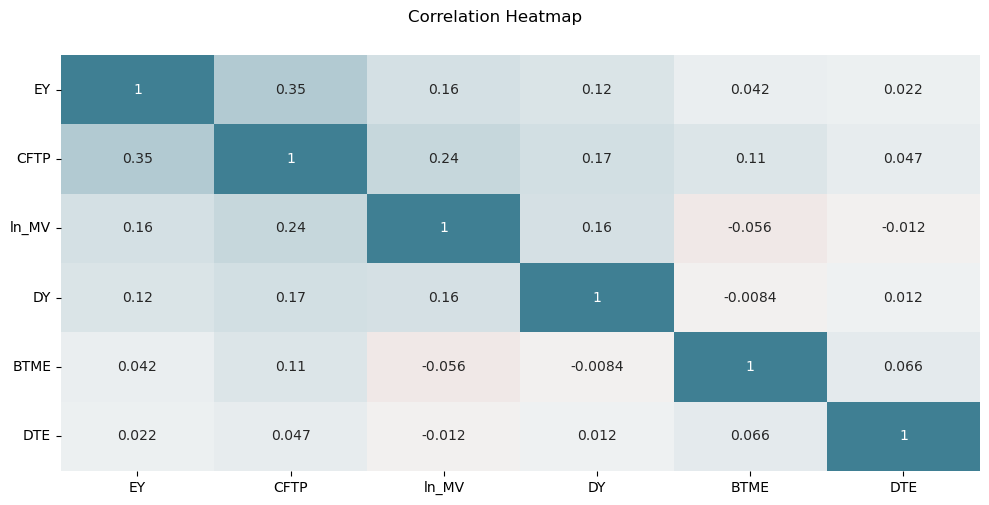

In [73]:
pretty_heatmap(fin_ratio_df.drop(columns='HSI').corr(), center=0, title='Correlation Heatmap')

### 4. Baisc Linear Algebra + Regression Analysis

In [75]:
n, p = 50000, 3
X = rng.normal(size=(n, p))
X = pd.DataFrame(X).rename(columns=lambda i: f"X_{i}") # Rename columns from i to X_i, using f-string

b0 = 1000
beta = np.array([0.33, 0.67, 1.0])

epsilon = rng.normal(size=n)
y = X @ beta + b0 + epsilon

We first generate $Y =X \beta + \beta_0 + \epsilon$

In [77]:
X_1 = sm.add_constant(X)
A = X_1.T @ X_1
b = X_1.T @ y
beta_hat = np.linalg.solve(A, b) # solves x where Ax=b
beta_hat

array([9.99995424e+02, 3.19958972e-01, 6.68694349e-01, 1.00397024e+00])

In [78]:
mod = sm.OLS(y, X_1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:52:59   Log-Likelihood:                -70809.
No. Observations:               50000   AIC:                         1.416e+05
Df Residuals:                   49996   BIC:                         1.417e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        999.9954      0.004   2.24e+05      0.000     999.987    1000.004
X_0            0.3200      0.004     71.710      0.000       0.311       0.329
X_1            0.6687      0.004    149.812      0.000       0.660       0.677
X_2            1.0040      0.004    224.273      0.000       0.995       1.013
==============================================================================
Omnibus:                        2.036   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                2.032
Skew:                           0.009   Prob(JB):                        0.362
Kurtosis:                       3.026   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The learnt $\hat \beta$ is indeed very close to true $\beta$

In [80]:
data = pd.concat({**X, 'y': y}, axis=1)
lm = ols(r'y~X_0+X_1+X_2', data=data).fit() #you can also google how to fit without intercept
print(sm.stats.anova_lm(lm, typ=2))

                sum_sq       df             F  PR(>F)
X_0        5114.580005      1.0   5142.386970     0.0
X_1       22322.376830      1.0  22443.739203     0.0
X_2       50026.201154      1.0  50298.183771     0.0
Residual  49725.651413  49996.0           NaN     NaN


The above we can also run the classic ANOVA.

### 5. Simulating Correlated RV

Note that any linear combination of normal random variables/vectors are also normally distributed. 

**Univariate case:** if $Z \sim \mathcal{N}(0, 1)$, then
\begin{equation*}
    X = \mu + \sigma Z \sim \mathcal{N}(\mu, \sigma^2) \, ,
\end{equation*}
and note that
\begin{align*}
    \mathbb{E}(X) &= \mu + \sigma \mathbb{E}(Z) = \mu \, , \\
    {\rm Var}(X) &= \sigma^2 {\rm Var}(Z) = \sigma^2 \, .
\end{align*}

**Multivariate case:** if $\mathbf{Z} = (Z_1, \cdots, Z_p)^\top \sim \mathcal{N}_p(\mathbf 0_p, \mathbf I_p)$ and there is a Cholesky decomposition $\mathbf C$ of $\mathbf \Sigma$ such that $\mathbf C^\top \mathbf C = \mathbf \Sigma$, then
\begin{equation*}
    \mathbf X = \mathbf \mu + \mathbf C^\top \mathbf Z \sim \mathcal{N}_p(\mathbf \mu, \mathbf \Sigma) \, ,
\end{equation*}
where $\mathbf \mu \in \mathbb{R}^p$ and note that
\begin{align*}
    \mathbb{E}(\mathbf X) &= \mathbf \mu + \mathbf C^\top \mathbb{E}(\mathbf Z) = \mathbf \mu \, , \\
    {\rm Var}(\mathbf X) &= \mathbf C^\top {\rm Var}(\mathbf Z) \mathbf C = \mathbf \Sigma \, .
\end{align*}

Given that $X \sim \mathcal{N}(0, 1)$ and $Y \sim \mathcal{N}(0, 1)$ such that $X, Y$ independent, then
\begin{equation*}
    Z := \frac{1}{2} X + Y \sim \mathcal{N}(0, 1.25) \, ,
\end{equation*}
in which
\begin{align*}
    \mathbb{E}(Z) &= \frac{1}{2} \mathbb{E}(X) + \mathbb{E}(Y) = 0 \, , \\
    {\rm Var}(Z) &= \frac{1}{4} {\rm Var}(X) + {\rm Var}(Y) = 1.25 \, .
\end{align*}

#### Application: Stock Price Simulation

The assumption of the Black-Scholes model for the price of a stock is:
\begin{equation}
	\frac{\delta S}{S} \sim N(\mu\delta t, \sigma^2\delta t).
\end{equation}


\begin{equation}
	\frac{S_{t+1}-S_t}{S_t}=\mu\delta t+\sigma\sqrt{\delta t} \varepsilon, \hspace{0.2cm} \text{where} \hspace{0.2cm} \varepsilon \sim N(0,1) 
\end{equation}

However, the above is only for one stock. The multivariate version of is as follows:

\begin{equation}
	\begin{pmatrix}\delta S_1/S_1 \\ \vdots \\ \delta S_p/S_p \end{pmatrix} \sim N_p\left( \begin{pmatrix}\mu_1 \\ \vdots \\ \mu_p \end{pmatrix}(\delta t), \delta t \cdot \Sigma \right).
\end{equation}
Therefore we can simulate $p \times 1$ random vectors $v$ from the distribution above, 

\begin{equation*}
	\begin{pmatrix}v_1 \\ \vdots \\ v_p \end{pmatrix}=\begin{pmatrix}\mu_1 \\ \vdots \\ \mu_p \end{pmatrix}(\delta t)+\sqrt{\delta t}C^\top \begin{pmatrix}z_1 \\ \vdots \\  z_p \end{pmatrix}, \hspace{0.3cm} \text{where} \hspace{0.3cm} z_1,z_2,
	\dots,z_p \hspace{0.2cm}\text{are iid} \hspace{0.2cm} N(0,1),
\end{equation*}
where the matrix $C$ is defined such that $C^\top C=\Sigma$

Then we can compute the simulated sample paths of the $p$ stocks using the following recursion:

\begin{equation*}
	\begin{pmatrix}S_{t+1,1} \\ \vdots \\ S_{t+1,p} \end{pmatrix}=\begin{pmatrix}S_{t,1}(1+v_1) \\ \vdots \\ S_{t,p}(1+v_p) \end{pmatrix}.
\end{equation*}

**Remark**:
The Cholesky decomposition for $3 \times 3$ matrices is:
\begin{align*}
	%\raggedleft
	A &= \begin{pmatrix} c_{11} && 0          && 0 \\ 
		c_{12} && c_{22}  && 0 \\
		c_{13} && c_{32}  && c_{33}\\	
	\end{pmatrix}
	\begin{pmatrix} c_{11}  && c_{12}  && c_{13} \\ 
		0          && c_{22}  && c_{23} \\
		0          && 0          && c_{33}\\	
	\end{pmatrix}\\ 
	&=  \begin{pmatrix} 
		c_{11}^2         && c_{12}c_{11}                       && c_{13}c_{11} \\ 
		c_{21}c_{11}  && c_{22}^2+c_{12}^2              && c_{13}c_{12}+c_{23}c_{22} \\
		c_{31}c_{11}  && c_{13}c_{12}+c_{23}c_{22} && c_{33}^2+c_{23}^2+c_{13}^2\\	
	\end{pmatrix}.
\end{align*}

#### Coding Example

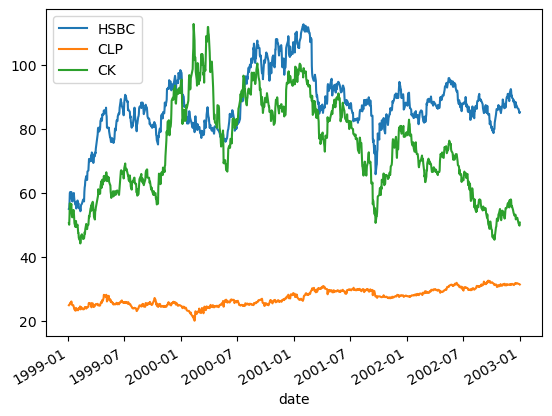

In [89]:
px = read_file('HSI/stock_1999_2002.csv', index_col=0) # means we set column 0 as the index
px = px.rename_axis('date')
px.index = pd.to_datetime(px.index, format='%d/%m/%Y')
px.plot();

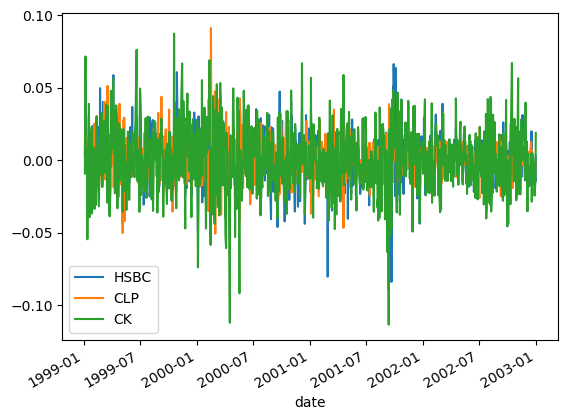

In [90]:
rets = np.log(px).diff()
rets.plot();

In [91]:
mu_np = rets.mean().values
cov_np = rets.cov().values
mu_np, cov_np

(array([4.45324076e-04, 2.35190792e-04, 3.81328256e-06]),
 array([[2.78544424e-04, 5.34655405e-05, 2.16591115e-04],
        [5.34655405e-05, 1.67166925e-04, 7.24164793e-05],
        [2.16591115e-04, 7.24164793e-05, 5.04352709e-04]]))

In [92]:
# Cholesky Decomposition
C = scipy.linalg.cholesky(cov_np) 
C.T @ C

array([[2.78544424e-04, 5.34655405e-05, 2.16591115e-04],
       [5.34655405e-05, 1.67166925e-04, 7.24164793e-05],
       [2.16591115e-04, 7.24164793e-05, 5.04352709e-04]])

We see indeed $\Sigma = C^TC$

In [94]:
# Generating Random Numbers
n = 2520
Z = rng.normal(size=(n, rets.shape[1]))
X = Z @ C + mu_np

Now, pick $n=10$ years, we first simulate i.i.d. $Z_{n \times p}$, and Let $X_{n \times p} = ZC + \mu$.

Then we know the empirical covariance matrix $:= \mathbb{E}[\hat{\Sigma}] = \frac{1}{n} E[X^TX] = \frac{1}{n} C^T \mathbb{E}[Z^TZ] C = \Sigma $

In [96]:
# Define the dates to be simulated
last_date = px.index[-1]
dates_sim = pd.bdate_range(start=last_date + pd.tseries.offsets.BDay(1),
                           end=last_date + pd.tseries.offsets.BDay(n))

rets_sim = pd.DataFrame(X, columns=rets.columns, index=dates_sim)
rets_sim.mean(), rets_sim.cov()

(HSBC    0.000599
 CLP     0.000248
 CK      0.000502
 dtype: float64,
           HSBC       CLP        CK
 HSBC  0.000267  0.000057  0.000212
 CLP   0.000057  0.000163  0.000077
 CK    0.000212  0.000077  0.000500)

<Axes: >

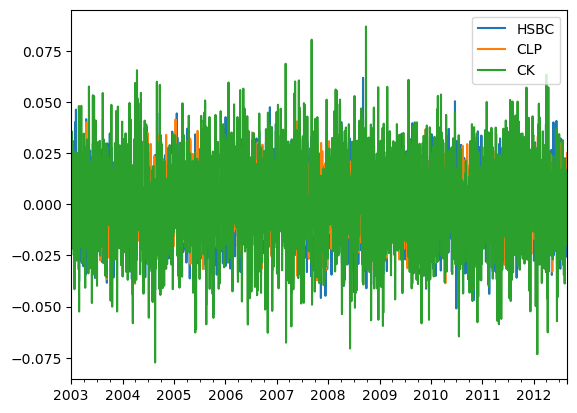

In [97]:
rets_sim.plot()

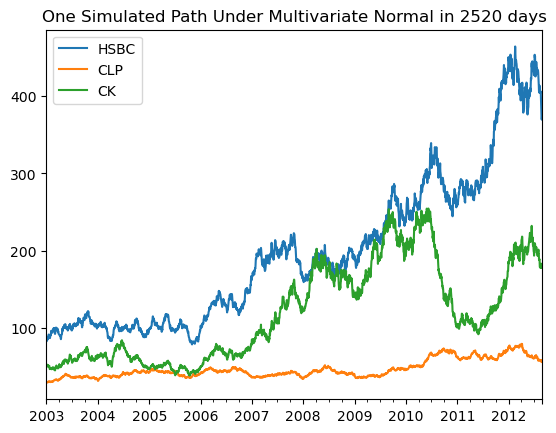

In [98]:
last_px = px.iloc[-1]
px_sim = last_px * np.exp(rets_sim.cumsum())
px_sim.plot(title=f'One Simulated Path Under Multivariate Normal in {n} days');

### 6. Conclusion

I hope that you have revised some basics of Python. Whenever you don't know how to solve a problem, Google first!

Please start brainstorming the dataset you want to work on asap! You are encouraged to chat with me from time to time. 

For appointments, email me at ccyccyjustin@gmail.com 